In [8]:
import random
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import sklearn

pickle_file = '../../dataset/arbimon_VGG.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (705, 224, 224) (705,)
Validation set (235, 224, 224) (235,)
Test set (235, 224, 224) (235,)


In [24]:
train_labels

array([         0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          1,          1,
                1,          1,          1,          1,          1,
                1,          1,          1,          1,          1,
                1,          1,          1,          1,          1,
                1,          1,          1,          1,          1,
                1,          1,          1,          1,          1,
                1,          1,          1,          1,          1,
                1,          2,          2,          2,          2,
                2,          2,          2,          2,        

In [6]:
image_size = train_dataset.shape[2]
num_channels = 1
num_labels = 21

def reformat(dataset):#, labels):
    #dataset = np.squeeze(dataset).shape
    dataset = dataset.reshape((-1, image_size, image_size, num_channels, )
                           ).astype(np.float32)
  #labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset#, labels
X_train = reformat(train_dataset)#, train_labels)
X_validation = reformat(valid_dataset)#, valid_labels)
X_test = reformat(test_dataset)#, test_labels)
y_train = train_labels
y_validation = valid_labels
y_test = test_labels
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_validation.shape, y_validation.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (91, 28, 28, 1) (91,)
Validation set (30, 28, 28, 1) (30,)
Test set (30, 28, 28, 1) (30,)


In [19]:
train_labels

array([         0,          0,          0,          0,          0,
                1,          1,          1,          1,          1,
                2,          2,          2,          2,          2,
                3,          3,          3,          3,          3,
                4,          4,          4,          4,          4,
                5,          5,          5,          5,          5,
                6,          6,          6,          6,          6,
                7,          7,          7,          7,          7,
                8,          8,          8,          8,          8,
                9,          9,          9,          9,          9,
               10,         10,         10,         10,         10,
               11,         11,         11,         11,         11,
               12,         12,         12,         12,         12,
               13,         13,         13,         13,         13,
               14,         14,         14,         14,        

16


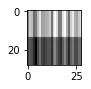

In [14]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [15]:
X_train, y_train = shuffle(X_train, y_train)

In [16]:
EPOCHS = 50
BATCH_SIZE = 20

In [17]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[1000,500,250,100],
                                        n_classes=21,
                                        feature_columns = feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size = 20, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f73d3a794e0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp3_o1rz33'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for 

/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:277: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp3_o1rz33/model.ckpt.
INFO:tensorflow:loss = 3.04969, step = 1


InvalidArgumentError: Received a label value of 2083287558 which is outside the valid range of [0, 21).  Label values: 10 2083287558 2 1 16876291 1 12 3 12 11 9 11 5 6 1 9 14 15 0 4
	 [[Node: dnn/multi_class_head/softmax_cross_entropy_loss = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/logits/BiasAdd, _arg_output_0_1)]]

Caused by op 'dnn/multi_class_head/softmax_cross_entropy_loss', defined at:
  File "/home/kropotkin/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/kropotkin/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2808, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-091ccd630a93>", line 5, in <module>
    dnn_clf.fit(x=X_train, y=y_train, batch_size = 20, steps=1000)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 464, in fit
    SKCompat(self).fit(x, y, batch_size, steps, max_steps, monitors)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 1439, in fit
    monitors=all_monitors)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 480, in fit
    loss = self._train_model(input_fn=input_fn, hooks=hooks)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 986, in _train_model
    model_fn_ops = self._get_train_ops(features, labels)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 1202, in _get_train_ops
    return self._call_model_fn(features, labels, model_fn_lib.ModeKeys.TRAIN)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 1166, in _call_model_fn
    model_fn_results = self._model_fn(features, labels, **kwargs)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/dnn.py", line 209, in _dnn_model_fn
    logits=logits)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/head.py", line 1064, in create_model_fn_ops
    enable_centered_bias=self._enable_centered_bias)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/head.py", line 636, in _create_model_fn_ops
    loss, weighted_average_loss = loss_fn(labels, logits, weight_tensor)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/head.py", line 1093, in _wrapped_loss_fn
    return self._loss_fn(self._label_ids(labels), logits, weights=weights)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/head.py", line 960, in _softmax_cross_entropy_loss
    labels=labels, logits=logits, name=name)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1879, in sparse_softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 4547, in _sparse_softmax_cross_entropy_with_logits
    labels=labels, name=name)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/kropotkin/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Received a label value of 2083287558 which is outside the valid range of [0, 21).  Label values: 10 2083287558 2 1 16876291 1 12 3 12 11 9 11 5 6 1 9 14 15 0 4
	 [[Node: dnn/multi_class_head/softmax_cross_entropy_loss = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/logits/BiasAdd, _arg_output_0_1)]]


In [3]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 1000

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation and test data into constants that are
  # attached to the graph.
  tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
  weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, num_labels]))
  biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the softmax and cross-entropy (it's one operation in TensorFlow, because
  # it's very common, and it can be optimized). We take the average of this
  # cross-entropy across all training examples: that's our loss.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  # These are not part of training, but merely here so that we can report
  # accuracy figures as we train.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
  test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

In [4]:
num_steps = 5001

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    if (step % 500 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_labels[:train_subset, :]))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))
# Originalmente el accuracy era alrededor de 29%

Initialized
Loss at step 0: 15.978478
Training accuracy: 6.7%
Validation accuracy: 5.9%
Loss at step 500: 0.478069
Training accuracy: 88.7%
Validation accuracy: 27.3%
Loss at step 1000: 0.232198
Training accuracy: 93.7%
Validation accuracy: 28.5%
Loss at step 1500: 0.138950
Training accuracy: 96.8%
Validation accuracy: 29.1%
Loss at step 2000: 0.092657
Training accuracy: 97.7%
Validation accuracy: 29.1%
Loss at step 2500: 0.064044
Training accuracy: 98.3%
Validation accuracy: 29.6%
Loss at step 3000: 0.046049
Training accuracy: 99.1%
Validation accuracy: 29.8%
Loss at step 3500: 0.034212
Training accuracy: 99.4%
Validation accuracy: 30.0%
Loss at step 4000: 0.025888
Training accuracy: 99.5%
Validation accuracy: 30.4%
Loss at step 4500: 0.019897
Training accuracy: 99.8%
Validation accuracy: 30.4%
Loss at step 5000: 0.015818
Training accuracy: 99.8%
Validation accuracy: 30.4%
Test accuracy: 87.5%


In [9]:
batch_size = 1000

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, num_labels]))
  biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
  test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

In [10]:
num_steps = 5001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
# Original Accuracy was 37.5%

Initialized
Minibatch loss at step 0: 22.518734
Minibatch accuracy: 4.5%
Validation accuracy: 8.0%
Minibatch loss at step 500: 0.265693
Minibatch accuracy: 94.2%
Validation accuracy: 81.0%
Minibatch loss at step 1000: 0.057269
Minibatch accuracy: 98.9%
Validation accuracy: 83.9%
Minibatch loss at step 1500: 0.034027
Minibatch accuracy: 99.4%
Validation accuracy: 85.9%
Minibatch loss at step 2000: 0.050269
Minibatch accuracy: 99.5%
Validation accuracy: 86.6%
Minibatch loss at step 2500: 0.068615
Minibatch accuracy: 98.7%
Validation accuracy: 88.1%
Minibatch loss at step 3000: 0.021756
Minibatch accuracy: 99.8%
Validation accuracy: 88.3%
Minibatch loss at step 3500: 0.014260
Minibatch accuracy: 99.9%
Validation accuracy: 89.0%
Minibatch loss at step 4000: 0.008168
Minibatch accuracy: 100.0%
Validation accuracy: 88.8%
Minibatch loss at step 4500: 0.017465
Minibatch accuracy: 100.0%
Validation accuracy: 89.1%
Minibatch loss at step 5000: 0.005804
Minibatch accuracy: 100.0%
Validation accur

In [13]:
num_nodes= 2048
batch_size = 500

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights_1 = tf.Variable(
      tf.truncated_normal([image_size * image_size, num_nodes]))
    biases_1 = tf.Variable(tf.zeros([num_nodes]))
    weights_2 = tf.Variable(
      tf.truncated_normal([num_nodes, num_labels]))
    biases_2 = tf.Variable(tf.zeros([num_labels]))

    """
     keep_prob = tf.placeholder(tf.float32)
    dropout = tf.nn.dropout(relu_layer, keep_prob)
    logits = tf.matmul(dropout, weights_2) + biases_2
    
    """
    # Training computation.
    relu_layer=tf.nn.relu(tf.matmul(tf_train_dataset, weights_1) + biases_1)#notice the shape of tf_train_dataset and weights_1
    logits = tf.matmul(relu_layer, weights_2) + biases_2
    loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels = tf_train_labels, logits = logits ))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights_1) + biases_1), weights_2) + biases_2)
    test_prediction =  tf.nn.softmax(
     tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights_1) + biases_1), weights_2) + biases_2)

In [14]:
num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
      print ("============================")
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
#Original was 38%

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 447.314667
Minibatch accuracy: 15.6%
Validation accuracy: 11.1%


KeyboardInterrupt: 